# Financial Budget Analysis with Python

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("India_budget_2021.xlsx")
data.head()

,Department /Ministry,Fund allotted(in crores)
0,MINISTRY OF AGRICULTURE,131531.19
1,DEPARTMENT OF ATOMIC ENERGY,18264.89
2,"MINISTRY OF AYURVEDA, YOGA",2970.30
3,MINISTRY OF CHEMICALS AND FERTILISER,80714.94
4,MINISTRY OF CIVIL AVIATION,3224.67


Let’s have a look at all the departments that are covered in this budget:

In [34]:
print(data)

                                 Department /Ministry  \
0                             MINISTRY OF AGRICULTURE   
1                         DEPARTMENT OF ATOMIC ENERGY   
2                          MINISTRY OF AYURVEDA, YOGA   
3                MINISTRY OF CHEMICALS AND FERTILISER   
4                          MINISTRY OF CIVIL AVIATION   
5                                    MINISTRY OF COAL   
6                   MINISTRY OF COMMERCE AND INDUSTRY   
7                           MINISTRY OF COMMUNICATION   
8                        MINISTRY OF CONSUMER AFFAIRS   
9                       MINISTRY OF CORPORATE AFFAIRS   
10                                MINISTRY OF CULTURE   
11                                MINISTRY OF DEFENCE   
12    MINISTRY OF DEVELOPMENT OF NORTH EASTERN REGION   
13                         MINISTRY OF EARTH SCIENCES   
14                              MINISTRY OF EDUCATION   
15  MINISTRY OF ELECTRONICS AND INFORMATION TECHNO...   
16                    MINISTRY 

I can see a NaN value in this dataset, let’s remove the NaN values and continue with the task of financial budget analysis with Python:

In [35]:
data.dropna()

,Department /Ministry,Fund allotted(in crores)
0,MINISTRY OF AGRICULTURE,131531.19
1,DEPARTMENT OF ATOMIC ENERGY,18264.89
2,"MINISTRY OF AYURVEDA, YOGA",2970.30
3,MINISTRY OF CHEMICALS AND FERTILISER,80714.94
4,MINISTRY OF CIVIL AVIATION,3224.67
5,MINISTRY OF COAL,534.88
6,MINISTRY OF COMMERCE AND INDUSTRY,12768.25
7,MINISTRY OF COMMUNICATION,75265.22
8,MINISTRY OF CONSUMER AFFAIRS,256948.40
9,MINISTRY OF CORPORATE AFFAIRS,712.13


I can see that not all the departments that are covered in this dataset are the main departments, as some departments can be covered in the others category. So let’s prepare the data by only selecting the main departments and putting all the other departments in the other category:

In [36]:
data = data.iloc[[0,8,11,14,18,23,41,42,43],:]
row = {'Department /Ministry': 'OTHERS', 'Fund allotted(in crores)': 592971.0800000001}
# Convert the row to a DataFrame
row_dataframe = pd.DataFrame([row])

# Concatenate the original DataFrame with the new row DataFrame
result_data = pd.concat([data, row_dataframe], ignore_index=True)
print(result_data)

                     Department /Ministry  Fund allotted(in crores)
0                 MINISTRY OF AGRICULTURE                 131531.19
1            MINISTRY OF CONSUMER AFFAIRS                 256948.40
2                     MINISTRY OF DEFENCE                 478195.62
3                   MINISTRY OF EDUCATION                  93224.31
4                     MINISTRY OF FINANCE                1386273.30
5                MINISTRY OF HOME AFFAIRS                 166546.94
6                    MINISTRY OF RAILWAYS                 110054.64
7  MINISTRY OF ROAD TRANSPORT AND HIGHWAY                 118101.00
8           MINISTRY OF RURAL DEVELOPMENT                 133689.50
9                                  OTHERS                 592971.08


Now let’s plot this data to have a look at the priorities of the government for the financial year:

<Axes: xlabel='Department /Ministry'>

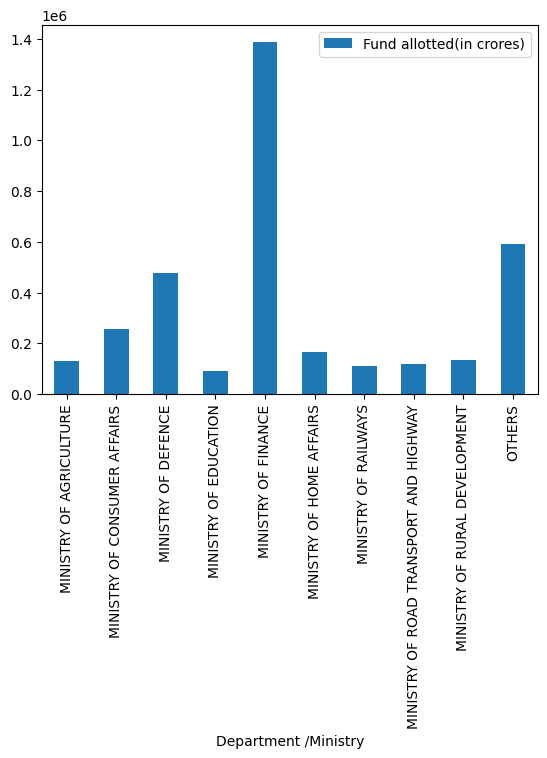

In [38]:
result_data.plot.bar(x='Department /Ministry', y='Fund allotted(in crores)')

We can see that the finance department is getting the most of the share from the total budget of the government. Now let’s plot this data into a donut plot to have a clear view of the distribution of funds among all the departments:

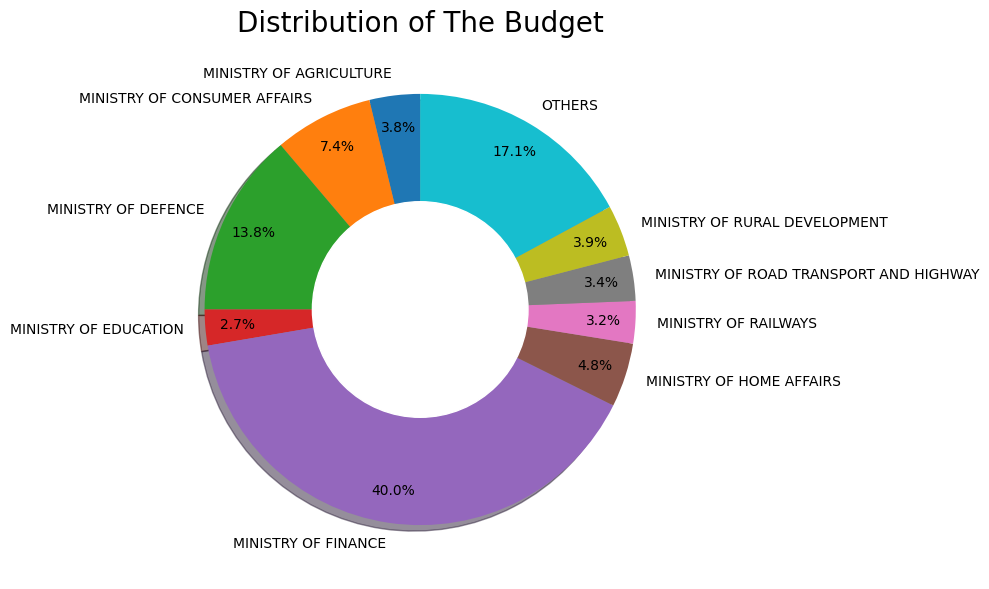

In [39]:
df = result_data["Fund allotted(in crores)"]
labels = result_data["Department /Ministry"]
plt.figure(figsize=(7,7))
plt.pie(df, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of The Budget", fontsize=20)
plt.show()

# Conclusion
We can see that the finance department is getting 40% of the funds. So this is how we can analyze a dataset that contains data about the revenue and expenditure of the government for a financial year.